In [6]:
# import external packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Add path with self-created packages and import them
import sys
sys.path.append('./src')
import sciebo


#### Download Dataset

This data has been pre-processed from Steinmetz and al 2019, and is hosted on Sciebo here: https://uni-bonn.sciebo.de/s/wjsBtZzUVjKaB3J .  The code below should download it to the folder `data/steinmetz_all.csv`

In [3]:
sciebo.download_from_sciebo('https://uni-bonn.sciebo.de/s/wjsBtZzUVjKaB3J', 'data/steinmetz_all.csv')

## Analyzing Behavioral Task Performance with Pandas and Seaborn: Psychometric Analysis on Ordered Categorical Data

In the experiment reported in by [Steinmetz et al, 2019 in Nature](https://www.nature.com/articles/s41586-019-1787-x), mice were tasked with turning a wheel to the left or right based on the relative contrast levels of two simultaneously-presented gradient stimuli:

<img src="https://uni-bonn.sciebo.de/index.php/apps/files_sharing/ajax/publicpreview.php?x=2560&y=921&a=true&file=steinmetz_task2.png&t=gulZ14DB3llTenW&scalingup=0" width=300>


##### Analysis Goals

In this notebook, we'll examine the `response_time` and `response_type` of each trial across all sessions, to determine whether the mice successfully performed the task, and whether the difference in contrast levels between the two stimuli affected their performance.  


##### Learning Goals

We'll use this as an opportunity to get to know the [`**Seaborn**`](https://seaborn.pydata.org/) Pytyhon package's core syntax.  Seaborn is a statistical plotting library that takes Pandas Dataframes and turns them into plots (including making errorbars)!  

**Load Data**: Use the `pd.read_csv()` function to load the `steinmetz_all.csv` file in the `data` folder into a Pandas DataFrame:

In [8]:
df = pd.read_csv('data/steinmetz_all.csv')
df.head()

,Unnamed: 0,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,0,1,True,100,0,0.5,1.027216,1.0,1.150204,1.186819,1.0,170.0,1.0,Cori,2016-12-14,5dd41e
1,1,2,True,0,50,0.5,0.874414,-1.0,1.399503,1.437623,1.0,230.0,-1.0,Cori,2016-12-14,5dd41e
2,2,3,True,100,50,0.5,0.825213,1.0,0.949291,0.986016,1.0,200.0,1.0,Cori,2016-12-14,5dd41e
3,3,4,True,0,0,0.5,0.761612,0.0,2.266802,2.296436,1.0,860.0,1.0,Cori,2016-12-14,5dd41e
4,4,5,True,50,100,0.5,0.662010,1.0,0.816776,0.827613,-1.0,140.0,1.0,Cori,2016-12-14,5dd41e


---

### Performance Analysis:  Average Response Type for Each Stimulu Contrast Level

How did the mice perform in the task, overall?  Let's use seaborn to make a basic statistical analysis comparing different variables against each other.


What makes Seaborn particularly nice is that most of its functions have the same syntax:

```python
sns.typeofplot(       #  Function name (what type of plot do you want to make?
    data=df,          #  Dataframe variable (what data will this plot be made from?)
    x="column1",      #  Column to use for the x axis of the plot.
    y="column2",      #  Column to use for the y axis of the plot.
    hue="column3",    #  Column to use for splitting the data into different colors.
    ...               # ...more columns can be added, to make a richer and more complex plot!
)
```

In this notebook, we'll look at the plots that helps compare a continuous variable across different levels of a categorical variable:

| Plotting Function | Description | Example |
| :-- | :-- | :-- |
| **`sns.barplot()`** | A bar plot | `sns.barplot(data=df, x='mouse', y='response_time')` |
| **`sns.pointplot()`** | a plot with errobars at markers for each category level, and a line connecting each point. | `sns.pointplot(dta=df, x='mouse', y='response_time')`   |

**Exercises**: On average, how did the subjects respond when presented with various contrast levels on the right and left stimuli?. For each exercise, we'll use seaborn to make the requested plot.




Make a point plot (points with error bars, connected by a line to indicate continuity) with experiment variables in the following way:
  - **x-axis**: Contrast levels for the left stimulus.
  - **y-axis**: Average response type (-1, 0, or 1)
  - **lines of different hues**: Contrast levels for the right stimulus.

What do you see in this plot; what indication is there that the mice learned the task?

#### Bar Plots

**Example**: Make a bar plot with `contrast_right` levels on the x-axis and `response_type` on the y-axis.  What do you observe?

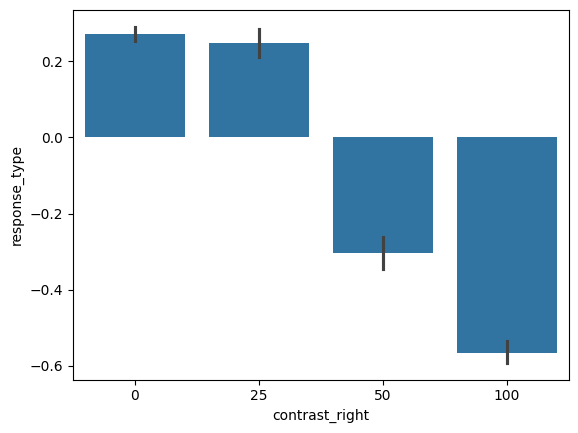

In [31]:
sns.barplot(data=df, x='contrast_right', y='response_type');

Make a bar plot with `contrast_left` levels on the x-axis and `response_type` on the y-axis.  What do you observe?

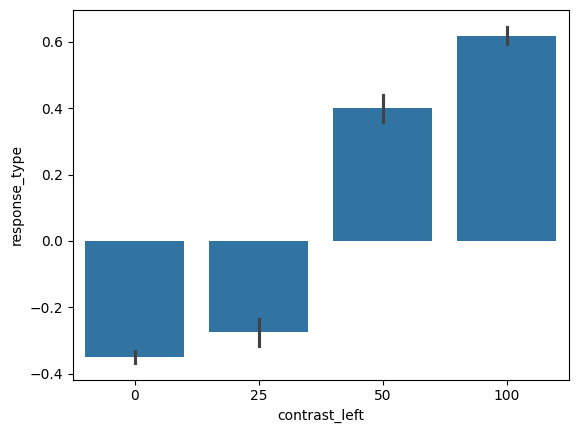

In [32]:
sns.barplot(data=df, x='contrast_left', y='response_type');

Make a bar plot with `response_type` as the x-axis and `contrast_left` levels on the y-axis.  What does seaborn do here? Is this what we want? (note: to fix this, you can add the argument `orient='h'`. By default, seaborn has `orient='v'`)

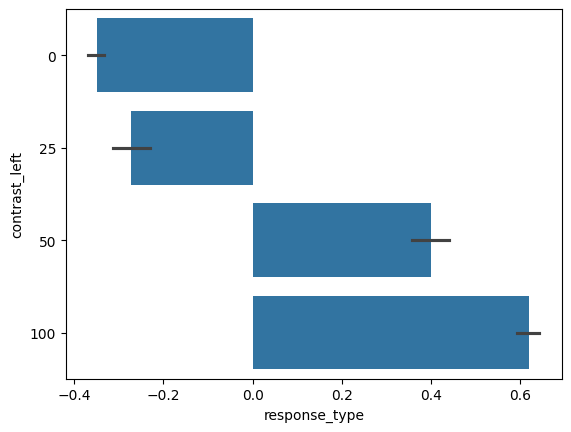

In [37]:
sns.barplot(data=df, y='contrast_left', x='response_type', orient='h');

Let's combine the x-axis and the hue together!  Make a bar plot with `contrast_left` levels on both the x-axis and hue and `response_type` on the y-axis. (Note: If you don't like having the legend anymore, you can additionally set `legend=False`.)

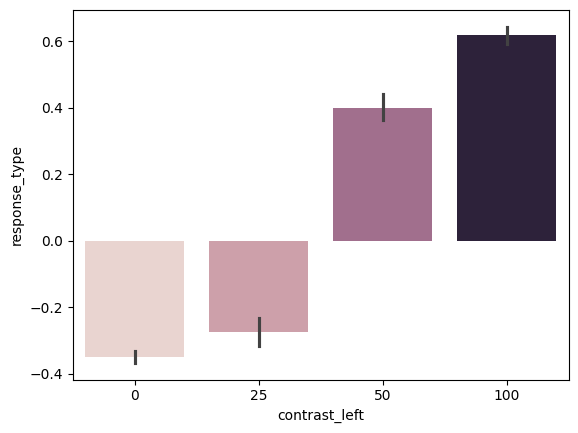

In [39]:
sns.barplot(data=df, x='contrast_left', hue='contrast_left', y='response_type', legend=False);

Make a bar plot with `contrast_left` levels on the x-axis and `response_type` as the `hue` (i.e. the color of the bars).  What do you observe?

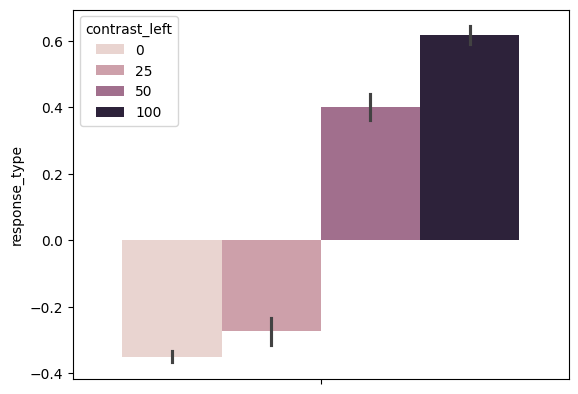

In [34]:
sns.barplot(data=df, hue='contrast_left', y='response_type');

How does the left_contrast values compare with the right_contrast values?  Make a bar plot with `contrast_left` levels on the x-axis, `contrast_right` on the hue, and `response_type` on the y-axis.  Waht's nice about this plot, and what's not so nice?

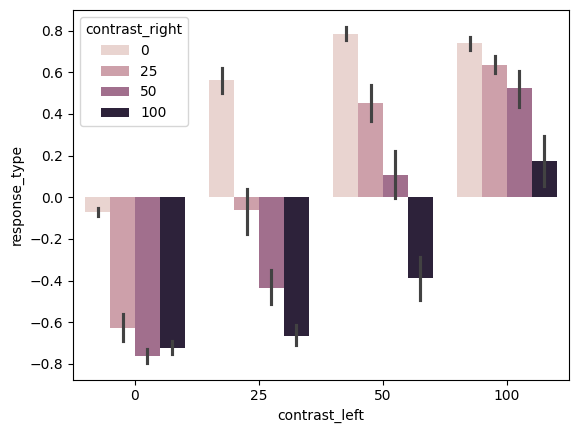

In [40]:
sns.barplot(data=df, x='contrast_left', hue='contrast_right', y='response_type');

##### Point Plots

**Example**: Make a point plot with `contrast_right` on the x_axis and `response_type` on the y_axis.  What do you observe?

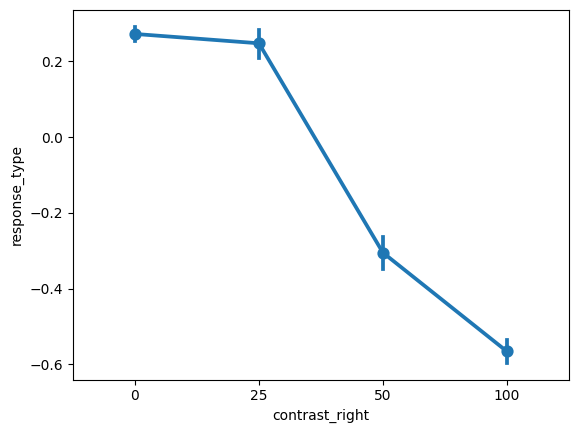

In [14]:
sns.pointplot(data=df, x='contrast_right', y='response_type');

Make a point plot with `contrast_left` on the x_axis and `response_type` on the y_axis.  What do you observe?

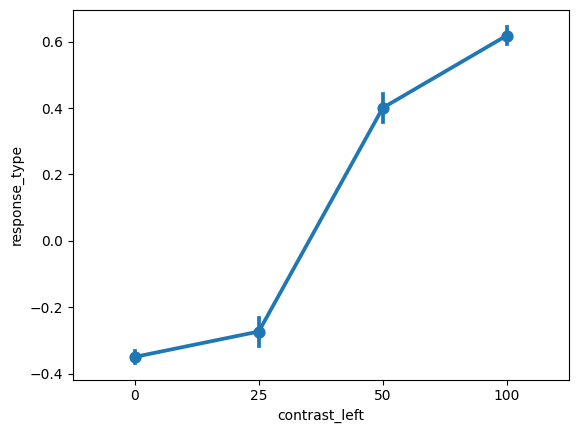

In [41]:
sns.pointplot(data=df, x='contrast_left', y='response_type');

Call the `sns.pointplot()` function twice (on two seperate lines), first with `contrast_left` on the x-axis and then with `contrast_right` on the x-axis.  What do you observe?  What's good and bad about this plot?

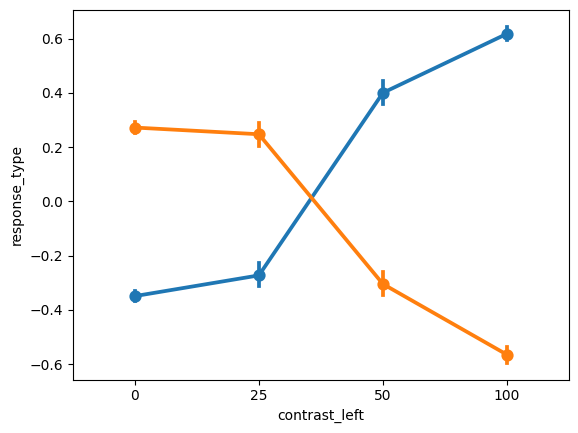

In [42]:
sns.pointplot(data=df, x='contrast_left', y='response_type');
sns.pointplot(data=df, x='contrast_right', y='response_type');

How does the left_contrast values compare with the right_contrast values?  Make a point plot with `contrast_left` levels on the x-axis, `contrast_right` on the hue, and `response_type` on the y-axis. What do you observe?  (Note: to shift values a bit to keep errorbars from obscuring each other, try setting `dodge=True`)

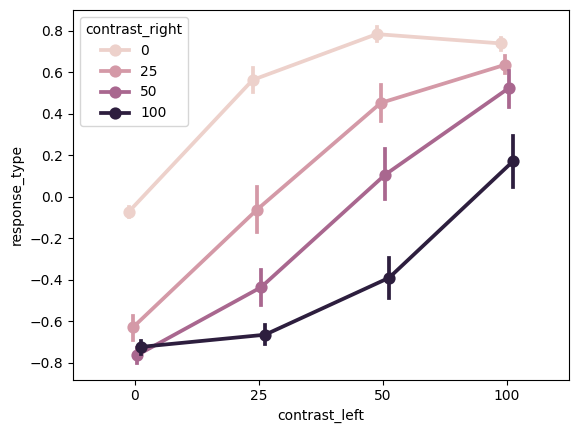

In [61]:
sns.pointplot(data=df, x='contrast_left', hue='contrast_right', y='response_type', dodge=True);

---

### Interpreting and Setting Error Bar Types: Confidence Intervals vs Standard Deviation vs Standard Error

Bar plots and point plots show "point estimates" of variable; also known as "aggregations" or "descriptive statistics".  For example, the mean and median are point estimates; they take a range of data and estimate its center at a single point.

Error bars are essential because they tell us either the variation in the data underlying that estimate, or alternatively the quality of the estimate (by showing the range of undertainty underlying it).  Here are the four most common types of errorbars and their purposes:

| Error Bar Type | Unit | Purpose | Implies Normal Distribution? | Seaborn Setting Example | Interpretation of Example |
| :-- | :-- | :-- | :-- | :-- | :-- |
| Standard Deviation | variable's unit | Show Data Variation | Yes | `errorbar=('sd', 1)` | "One Standard Deviation" | 
| Percent Interval | percent | Show Data Variation | No | `errorbar=('pi', 95)` | "95% Intervals" | 
| Standard Error (of the Mean) | variable's unit | Show Estimate Uncertainty | Yes | `errorbar=('se', 1)` | "One Standard Error" | 
| Confidence Intervals | percent | Show Estimate Uncertainty | No | `errorbar=('ci', 95)` | "95% Confidence Intervals" |


Seaborn by default calculates the mean of the data, and shows its uncertanty using 95% Confidence Intervals.  This is a good default, but it can be changed to other settings.  Let's get a feel for these error bar types!

**Exercises**: In each of the following exercises, explore the errorbars by re-making the last plot in the previous section, setting the errobars to different types and levels:

**Example**: Make 95% confidence intervals.

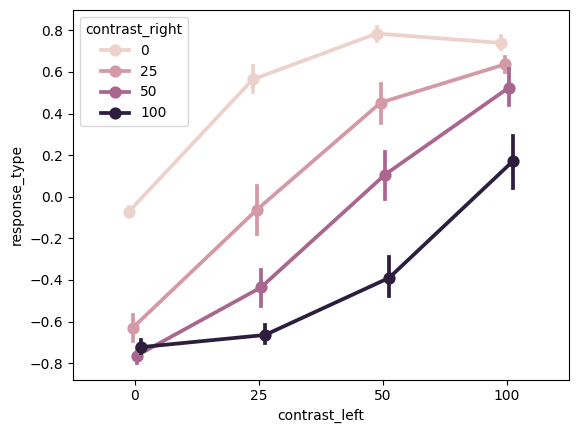

In [65]:
sns.pointplot(data=df, x='contrast_left', hue='contrast_right', y='response_type', dodge=True,  errorbar=('ci', 95), );

Make 0% confidence intervals.  What do you expect to see?

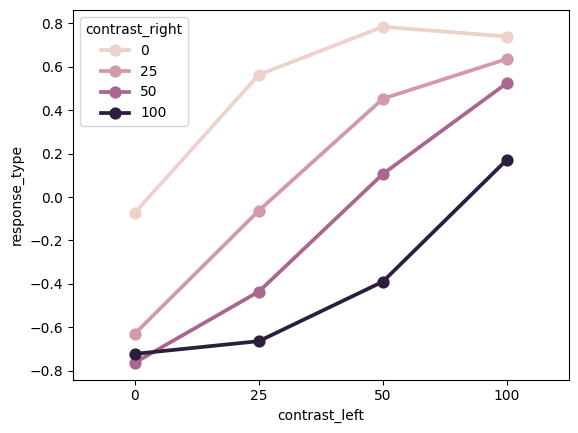

In [66]:
sns.pointplot(data=df, x='contrast_left', hue='contrast_right', y='response_type', errorbar=('ci', 0));

Make 25% confidence intervals.  What do you expect to see?

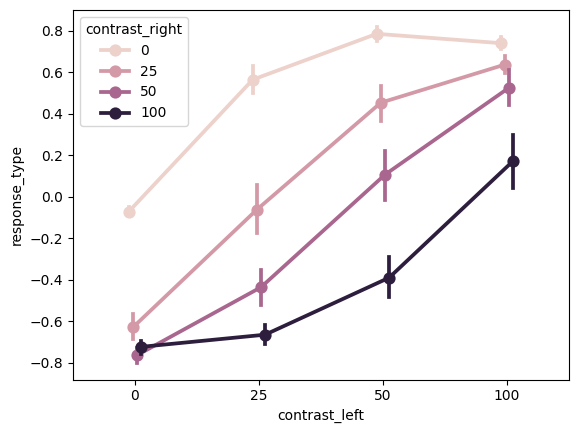

In [60]:
sns.pointplot(data=df, x='contrast_left', hue='contrast_right', y='response_type', errorbar=('ci', 95), dodge=True);

Make 99% confidence intervals. What do you expect to see?

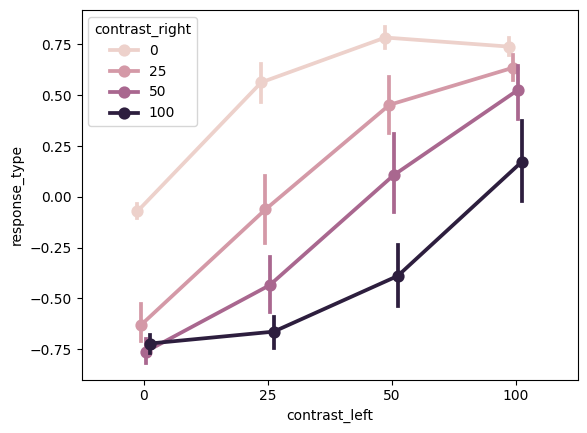

In [59]:
sns.pointplot(data=df, x='contrast_left', hue='contrast_right', y='response_type', errorbar=('ci', 99.9), dodge=True);

Set the error bars to show one standard deviation (`sd`) of the data.  What do you notice about these errobars, compared to the ones made previously?

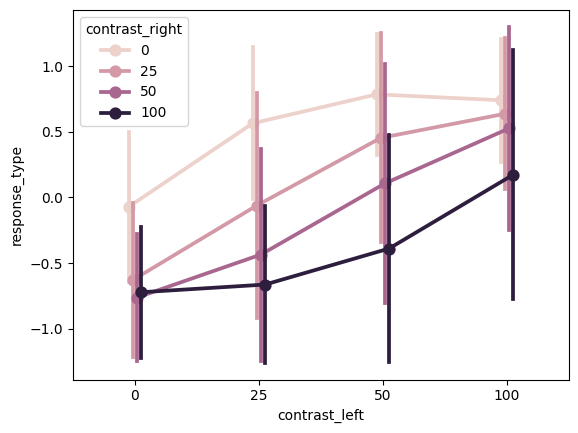

In [68]:
sns.pointplot(data=df, x='contrast_left', hue='contrast_right', y='response_type', errorbar=('sd', 1), dodge=True);

Set the error bars to show three standard deviations of the data (roughly the full range of data's variation in the dataset, assuming normally-distributed data)

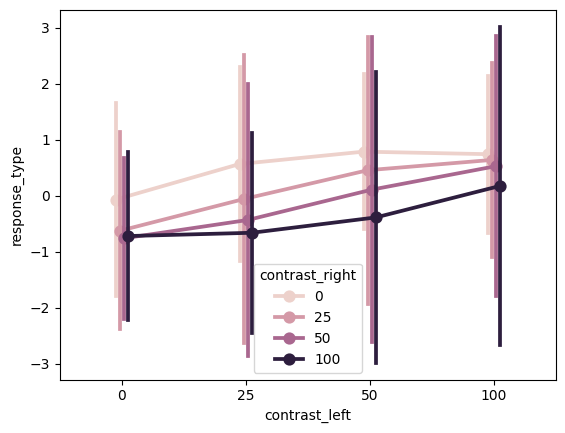

In [71]:
sns.pointplot(data=df, x='contrast_left', hue='contrast_right', y='response_type', errorbar=('sd', 3), dodge=True);

Account for the number of observations by setting the error bars to show one "Standard Error of the Mean" (`se`)

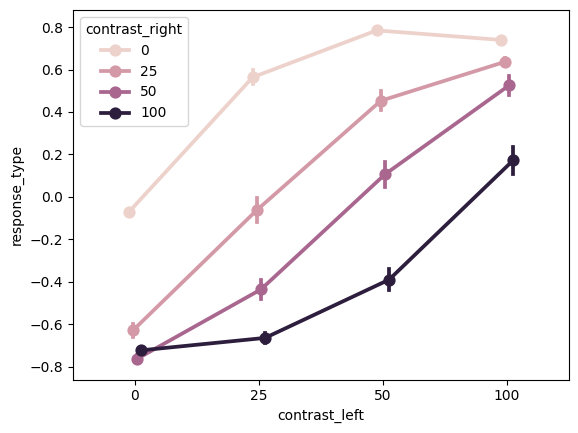

In [72]:
sns.pointplot(data=df, x='contrast_left', hue='contrast_right', y='response_type', errorbar=('se', 1), dodge=True);

Set the error bars to show two STandard Errors of the Mean, and compare this to the plot showing a 95% Confidence Interval.  What do you notice?

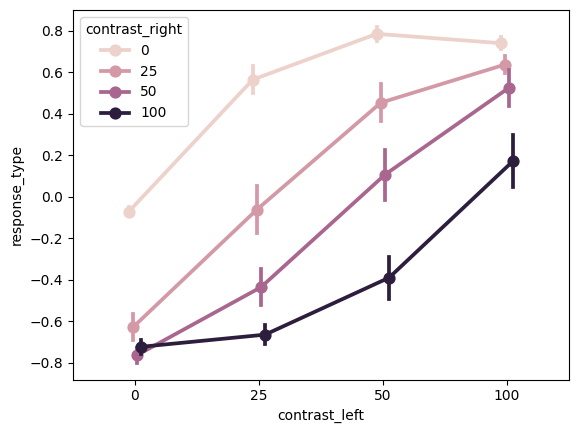

In [73]:
sns.pointplot(data=df, x='contrast_left', hue='contrast_right', y='response_type', errorbar=('se', 2), dodge=True);

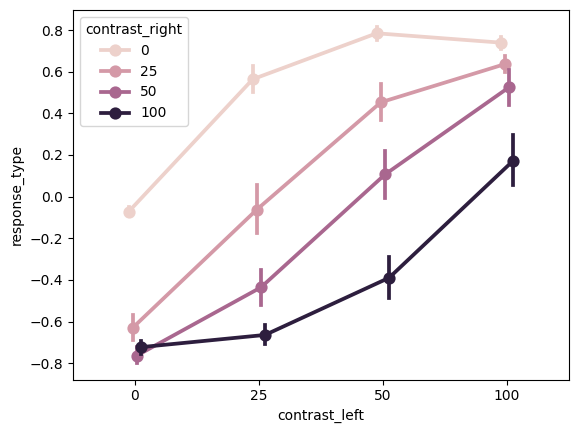

In [74]:
sns.pointplot(data=df, x='contrast_left', hue='contrast_right', y='response_type', errorbar=('ci', 95), dodge=True);

**(Extra)** Set the error bars to show 50% Intervals (`pi`).  What is strange about this plot?  Try setting it to different levels, and see what you get.  What does this indicate about the data? 

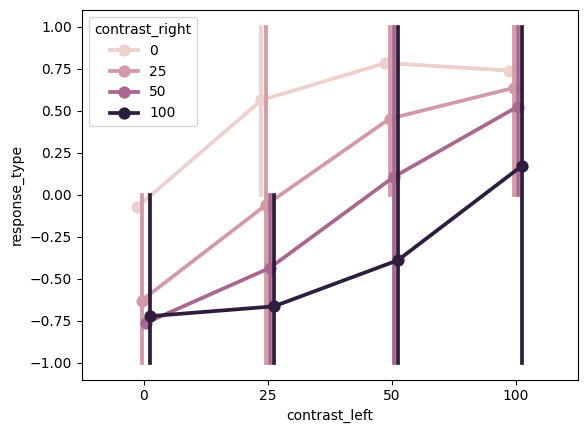

In [80]:
sns.pointplot(data=df, x='contrast_left', hue='contrast_right', y='response_type', errorbar=('pi', 50), dodge=True);

---

## Analyzing Response Time and Response Type: Plotting Transformed and Filtering Data, and Comparing Estimates

##### Making New Columns in Pandas DataFrames

The mice had to make a decision of whether to move the wheel left or right based on the *difference* in contrast between the left and right stimulus, not on the actual levels of the data. 
 Let's make a new column called `contrast_diff` that contains the contrast difference between the left and right stimuli, and make a point plot that shows the average response type for each value in contrast_diff, and focus only on the trials that the mouse actually responded.
  

In [93]:
df['contrast_diff'] = df['contrast_right'] - df['contrast_left']

Let's subtract out this effect by calculating a new `response_time_corrected` column, which subtracts the `gocue_time` from the `response_time`.

In [90]:
df['response_time_corrected'] = df['response_time'] - df['gocue_time']

 Instead of calculating the `contrast_diff`, let's calculate the `contrast_diff_absolute`, where the absolute value of the contrast difference is used, so it is always positive.  This more-closely shows the decision that the mice had to make, and allows us to use twice as many values for each point estimation.

In [91]:
df['contrast_diff_absolute'] = df['contrast_diff'].abs()

This plot seems to have a clear pattern, but it has a key weakness to it; it is an quantitative average of "categorical values"; values that have no implicit value.  In this case, the `response_type` variable can be -1, 0, or 1; averaging them doesn't give a clear idea of how many 0s there are in the data.  With categorical data that you'd like to treat as continuous, a simple thing that can be done is to reduce the number of categories to 2.  

So, let's simplify the analysis by considering only the trials where the mouse turned the wheel left (response_type == -1) or right (response_type == 1).  That way, if the average response_type is 0, then we know that it means there was an equal number of -1 and 1 values.

```python
mask = df['column'] == 'some_value'
df_masked = df[mask]
```

Let's re-make the psychometric curve point plot (x=`contrast_diff`, y=`respones_type`), but only using the trials where there was an observable response (`response_type != 0`)

In [89]:
df['did_respond'] = df['response_type'] != 0

##### Plotting Response Times: Comparing Different Estimates

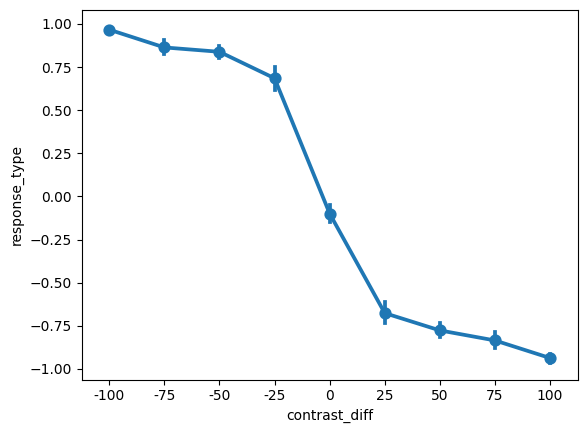

In [94]:
sns.pointplot(data=df[df['did_respond']], x='contrast_diff', y='response_type');

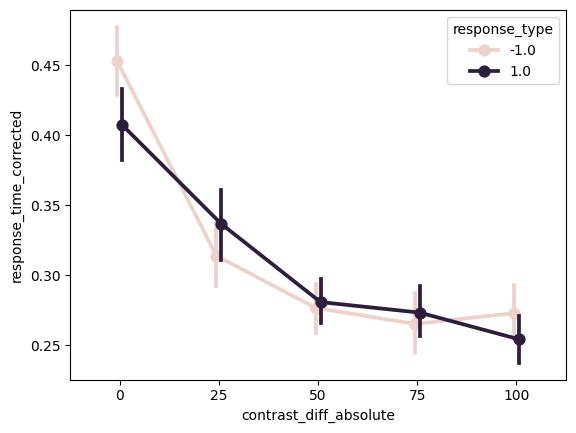

In [112]:
sns.pointplot(data=df[df['did_respond']], x='contrast_diff_absolute', hue='response_type', y='response_time_corrected', dodge=True);

Looks good!  Let's do one last thing to help more-accurately represent the results; address the problem of having a different number of trials in each session.  It could be that only some of the sessions are giving us our results!  This is common in "nested design" experiments, which most neuroscience experiments fit into.  To tell Seaborn to calculate its error bars taking into account each session's data, set `units="session_id"`.  


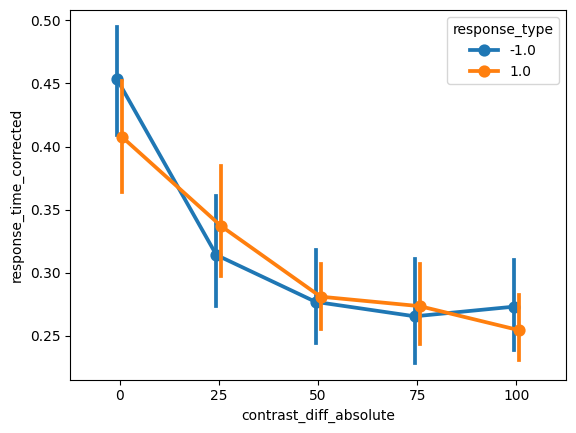

In [138]:
df['contrast_diff_absolute'] = df['contrast_diff'].abs()
sns.pointplot(
    data=df[mask].astype({'response_type': 'category'}), 
    x='contrast_diff_absolute', y='response_time_corrected', hue='response_type', 
    units='session_id', 
    dodge=True,
);

## (Example) Wrapping it Up: Exporting a Figure

Below is an example of how to export our two main results into a single figure with two subplots, then save it as a file (say, for a poster presentation)

In [130]:
plt.style.available;   # remove the semicolon to see other available styles

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


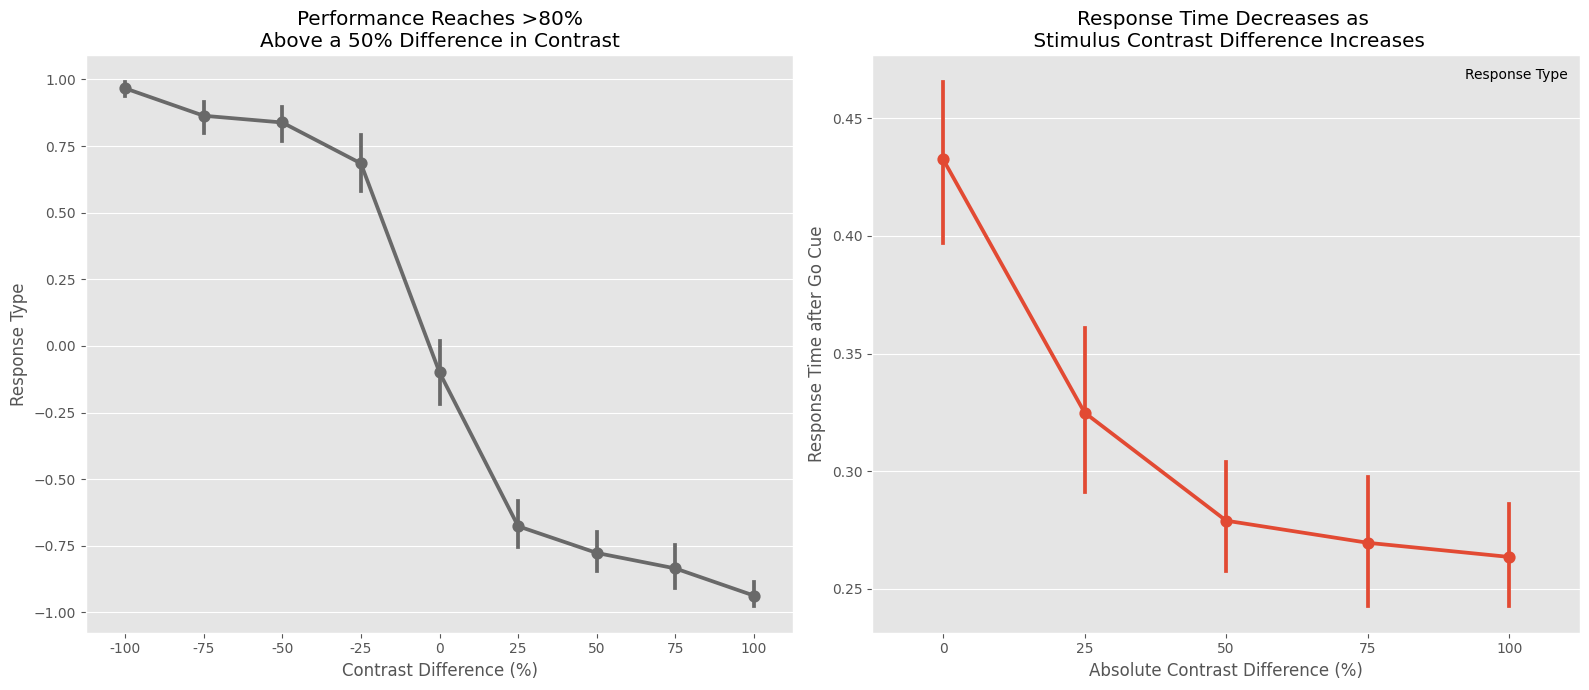

In [139]:
# Figure 1b
with plt.style.context(style='ggplot', after_reset=True):

    plt.figure(figsize=(16, 7))  # changing the figure size is an quick-and-dirty way to change the font size

    # Subplot 1
    plt.subplot(1, 2, 1)

    df['contrast_diff'] = df['contrast_right'] - df['contrast_left']
    mask = df['response_type'] != 0
    sns.pointplot(data=df[mask], x='contrast_diff', y='response_type', color='dimgrey', units='session_id');
    plt.title('Performance Reaches >80%\nAbove a 50% Difference in Contrast')
    plt.xlabel('Contrast Difference (%)')
    plt.ylabel("Response Type")

    # Subplot 2
    plt.subplot(1, 2, 2)

    mask = df['response_type'] != 0
    df['contrast_diff_absolute'] = df['contrast_diff'].abs()
    sns.pointplot(
        data=df[mask].astype({'response_type': 'category'}), 
        x='contrast_diff_absolute', y='response_time_corrected',
        #   hue='response_type', 
        units='session_id', 
        dodge=True,
    );
    plt.title('Response Time Decreases as \n Stimulus Contrast Difference Increases', )
    plt.xlabel('Absolute Contrast Difference (%)')
    plt.ylabel("Response Time after Go Cue")
    plt.legend(title="Response Type", frameon=False);

    # Correct the spacing between subplots, to fix some kinds of accidental overlap.
    plt.tight_layout()

    # Save the figure 
    # plt.savefig('performance.svg', dpi=200)  # for editing later in a vector graphics editor (i.e. Inkscape, Adobe Illustrator)
    plt.savefig('performance.png', dpi=200)  
